In [4]:
import re  # 正则表达式
import pandas as pd  # pandas数据分析
import numpy as np  # 
import matplotlib.pyplot as plt  # 可视化画图
import jieba # 分词
from wordcloud import WordCloud # 词云可视化

In [5]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#配置风格
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [6]:
data = pd.read_csv('CarCon.csv',encoding='gbk')
data.head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0


In [8]:
dd = data
dd['yy'] = data['最低价'].rank(ascending=False).astype("int")
dd.sort_values('yy',ascending=False).head(5) 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,yy
270,佳宝V52,一汽,微面,3.67,29200,27200,45,NaN,0,"油耗比较低,乘坐空间没的说",13,"油耗比较低,乘坐空间没的说",13,7.3,7.3,509
266,佳宝V75,一汽,微面,3.88,30900,28900,8,NaN,0,油耗满意,4,油耗满意,4,7.0,7.0,507
265,东风小康K07S,东风小康,微面,3.88,32900,28900,3,NaN,0,乘坐空间没问题,3,乘坐空间没问题,3,6.6,6.6,507
280,五菱之光小卡,五菱汽车,微卡,3.84,32900,29900,23,后排空间太小,3,"油耗满意,后排空间太小",9,油耗满意,6,7.5,7.5,505
262,长安之星3,长安欧尚,微面,3.99,39900,29900,43,"发动机噪音很大,起步动力肉",9,"乘坐空间够用,油耗满意,外观漂亮,保养费用便宜,大灯犀利,发动机噪音很大,高速油耗稳定,内饰...",69,"乘坐空间够用,油耗满意,大灯犀利",37,6.8,7.0,505


In [19]:
# 1根据总评数量来判断汽车在市场上的受欢迎程度前20辆
data.sort_values('总评数',ascending=False).head(5) 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0
49,名爵6,名爵,紧凑型车,4.69,146800,96800,3259,"悬架减震偏硬,胎噪有点大,车内静音效果不是很好",1217,"乘坐空间不错,外观漂亮,油耗满意,安全配置齐全,后备厢空间大,悬架减震偏硬,加速动力十足,胎...",7250,"乘坐空间不错,外观漂亮,油耗满意",3921,7.3,7.2
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5


In [20]:
# 2随后根据评论数大于80条的车辆进行判断，判断出各个类型的占比情况，通过饼状图展示，并通过表格降序展示
data2=data[data.总评数>80]
data2.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
10,奔奔,长安,微型车,4.26,56900,40900,241,"后备厢空间小,大灯不太亮,隔音差",60,"乘坐空间够用,油耗满意,外观漂亮,安全配置很实用,后备厢空间小,大灯不太亮,隔音差,转向手感...",410,"乘坐空间够用,油耗满意,外观漂亮",246,6.4,7.0
11,北斗星X5,铃木,微型车,4.25,51900,46900,87,"后排空间小,悬架减震硬,胎噪还好",22,"乘坐空间不错,油耗满意,外观漂亮,后备厢空间大,后排空间小,悬架减震硬,操控比较灵活,中控台...",210,"乘坐空间不错,油耗满意,外观漂亮",157,6.3,6.2
13,奇瑞QQ,奇瑞,微型车,4.07,50900,37900,402,"后备厢空间太小,隔音不好,发动机噪音难听",62,"油耗满意,外观漂亮,后备厢空间太小,头部空间大,隔音不好,前排空间很大,后排空间大,保养费用...",273,"油耗满意,外观漂亮,头部空间大",174,6.0,6.0
14,奥拓,铃木,微型车,4.00,59900,41800,1009,"隔音不好,车子配置太低,悬架减震偏硬",102,"外观漂亮,隔音不好,保养费用便宜,操控自如,车子配置太低,悬架减震偏硬,前排空间大,味道太重...",307,"外观漂亮,保养费用便宜,操控自如",138,5.4,6.6
15,比亚迪F0,比亚迪,微型车,3.88,47900,37900,153,"悬架减震硬,隔音不好,发动机噪音实在是大",37,"油耗满意,外观漂亮,乘坐空间够用,悬架减震硬,前排空间大,隔音不好,发动机噪音实在是大,后排...",160,"油耗满意,外观漂亮,乘坐空间够用",90,5.9,6.4


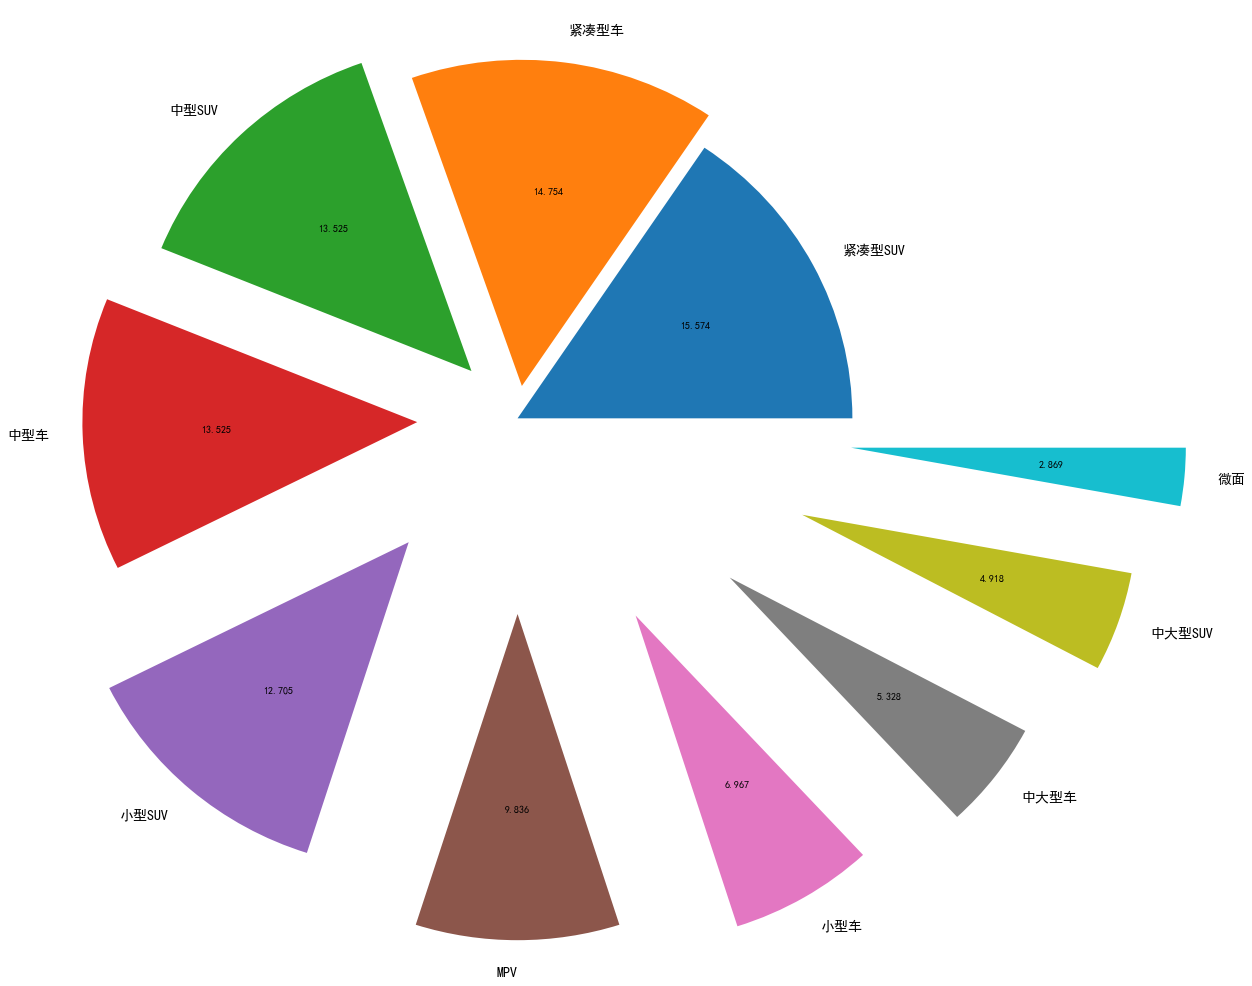

In [21]:
# 判断出各个类型的占比情况，通过饼状图展示
labels= list(data2['类型'].value_counts().head(10).index)
fracs = list(data2['类型'].value_counts().head(10).values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [22]:
# 并通过表格降序展示
count=data2['类型'].value_counts()
count.head()

紧凑型SUV    38
紧凑型车      36
中型SUV     33
中型车       33
小型SUV     31
Name: 类型, dtype: int64

In [23]:
# 3 计算出排名车型的平均油耗和平均价格    柱状图显示
data2['均耗油']=(data2['手动耗油/L']+data2['自动耗油/L'])/2
data3=data2.groupby('类型')['均耗油'].mean()
data3.head()

类型
MPV        9.018750
中型SUV      9.425000
中型车        8.769697
中大型SUV          NaN
中大型车      10.203846
Name: 均耗油, dtype: float64

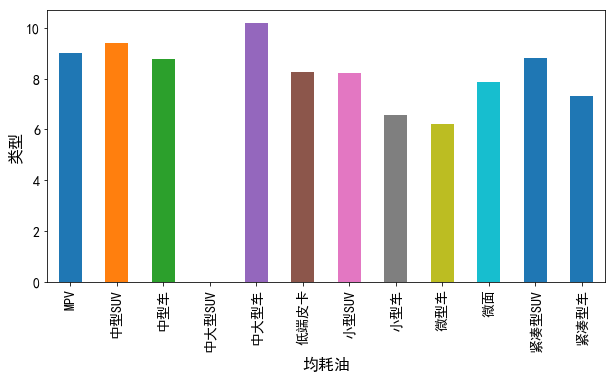

In [24]:
#柱状图显示
plt.figure(figsize=(10,5))
data3.plot.bar()
plt.xlabel("均耗油")
plt.ylabel("类型")
plt.show()

In [25]:
#平均价格
data2['均价格']=(data2['最高价']+data2['最低价'])/2
data3_=data2.groupby('类型')['均价格'].mean().astype(np.int64)
data3_.head()

类型
MPV       128229
中型SUV     230168
中型车       240512
中大型SUV    388458
中大型车      430573
Name: 均价格, dtype: int64

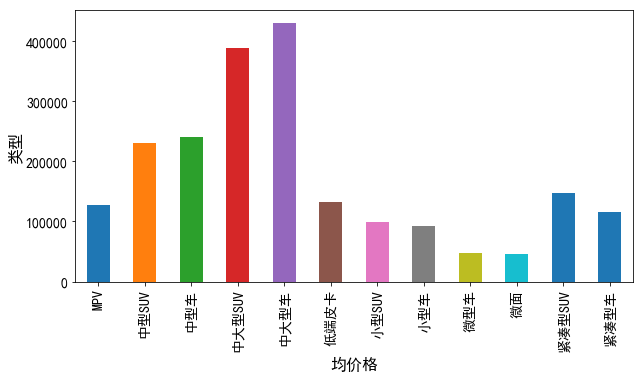

In [26]:
#柱状图显示
plt.figure(figsize=(10,5))
data3_.plot.bar()
plt.xlabel("均价格")
plt.ylabel("类型")
plt.show()

In [27]:
#  4展示前5种车型中，好评比总评的结果
a=['MPV','中型SUV','中型车','中大型SUV','中大型车']
data4=data2
# result = result[(result['var']>0.25) | (result['var']<-0.25)]
data4_=data4[(data4['类型']=='MPV') | (data4['类型']=='中型SUV') | (data4['类型']=='中型车') | (data4['类型']=='中大型SUV') | (data4['类型']=='中大型车')] 
data4_['类型']=data4['类型']
data4_['好评/总评']=data4['好评词次数']/data4['总评数']
data4_.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,均耗油,均价格,好评/总评
98,博瑞GE,吉利汽车,中型车,4.68,179800,136800,236,"后备厢空间有点小,悬架减震偏硬",51,"乘坐空间满意,外观很漂亮,后备厢空间有点小,油耗满意,功能配置很丰富,车内静音效果很棒,音响...",318,"乘坐空间满意,外观很漂亮,油耗满意",150,8.1,8.1,8.10,158300.0,0.635593
99,索纳塔九,现代,中型车,4.67,249800,169800,91,"胎噪比较大,悬架减震偏硬,悬架减震偏硬",29,"乘坐空间比较宽敞,外观很漂亮,车子配置挺满意,油耗满意,内饰造型挺好的,后排空间比较宽敞,转...",254,"乘坐空间比较宽敞,外观很漂亮,车子配置挺满意",135,8.0,5.8,6.90,209800.0,1.483516
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8,8.55,206800.0,1.375478
101,凯美瑞,丰田,中型车,4.64,279800,179800,1051,"胎噪有点大,起步动力肉,起步动力比较肉",163,"油耗满意,外观漂亮,安全配置很足,乘坐空间够用,乘坐空间足够,后备厢空间很大,内饰造型满意,...",3024,"油耗满意,外观漂亮,安全配置很足",1566,8.2,7.5,7.85,229800.0,1.490010
102,红旗H5,红旗,中型车,4.63,195800,149800,205,"油耗不爽,油耗不算低",49,"乘坐空间不错,外观漂亮,安全配置很好,乘坐空间充足,外观完美,安全配置很丰富,后备厢空间够用...",360,"乘坐空间不错,外观漂亮,安全配置很好",169,10.4,10.4,10.40,172800.0,0.824390


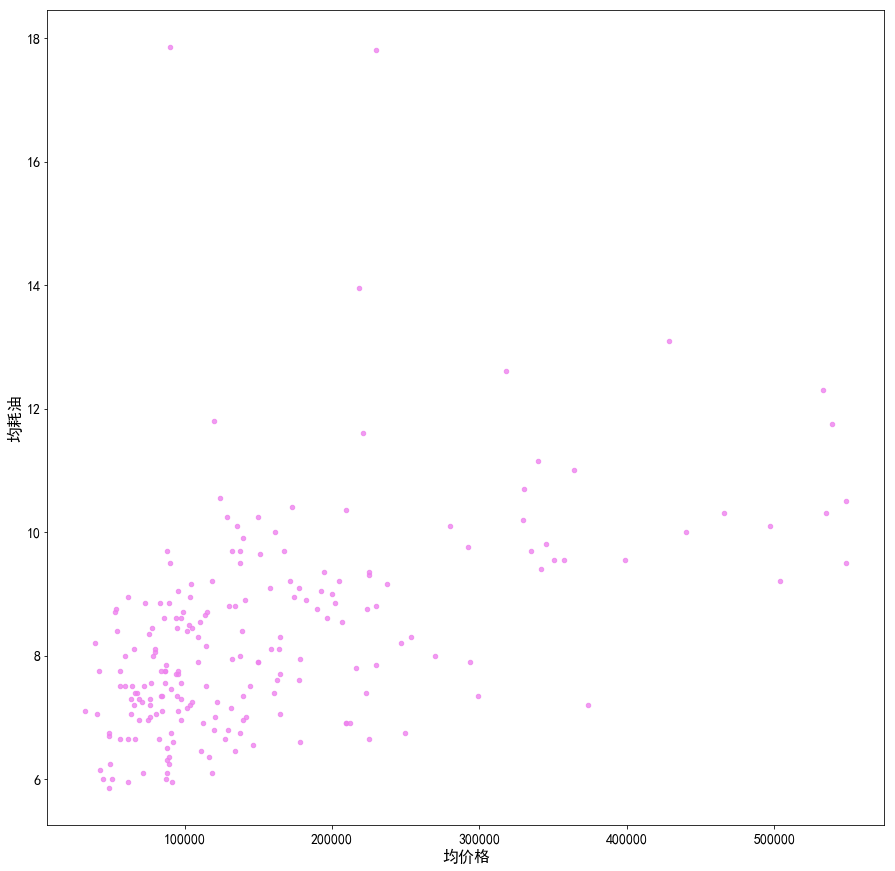

In [28]:
# 前五车类型中，均耗油和均价格关系
data4.plot(kind="scatter",x='均价格',y='均耗油',color='violet',alpha=0.8)
plt.xlabel("均价格")
plt.ylabel("均耗油")
plt.show()

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show


Loading BokehJS ...

In [30]:
# 价格/万 和  耗油的散点图

# 2、散点图不同 颜色上色/散点大小 的方法
# ① 数据中有一列专门用于设置颜色 / 点大小
rng = np.random.RandomState(1)
from bokeh.palettes import brewer

# colormap1 = {1: 'red', 2: 'green', 3: 'blue'}    
# df['color1'] = [colormap1[x] for x in rng.randint(1,4,100)]           # 调色盘1；
color = np.random.choice(['red', 'green', 'blue'], 100) # 调色盘1；跟上面两行是一样的；  这两种都是在本身的数据中增加size和color1标签，再去绘制图标；
size = rng.randint(10,20,200)   # 设置点大小字段

price = data4['均价格']/10000
p = figure(plot_width=600, plot_height=400)
p.circle(data4['均耗油'], price,       # 设置散点图x，y值
         line_color = 'white',   # 设置点边线为白色
         fill_color =color,fill_alpha = 0.5,   # 设置内部填充颜色，这里用到了颜色字段
         size = size       # 设置点大小，这里用到了点大小字段,按照size的随机数去设置点的大小
        )
show(p)

In [31]:
# 展示前5种车型中，好评比总评的结果  排名靠前15辆车，对这些车的油耗进行xyz 散点图图 分析，x轴车辆名称，y轴油耗，z轴好评比总评。
# （5个车型，一个车型15辆车，5个散点图）
# 前五车型分别是：MPV   中型SUV 中型车   中大型SUV   中大型车 
data4_1=data4_[(data4_['类型']=='MPV')]
data4_11=data4_1.head(15)

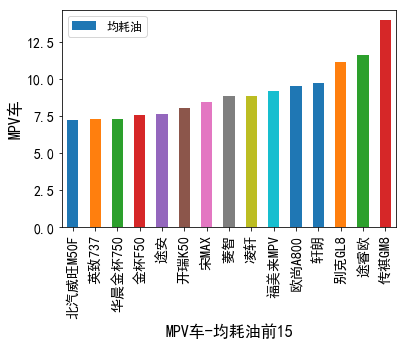

In [32]:
data4_11.sort_values(by='均耗油',inplace=True)
data4_11.plot.bar(x='车名',y='均耗油')
plt.xlabel("MPV车-均耗油前15")
plt.ylabel("MPV车")
plt.show()

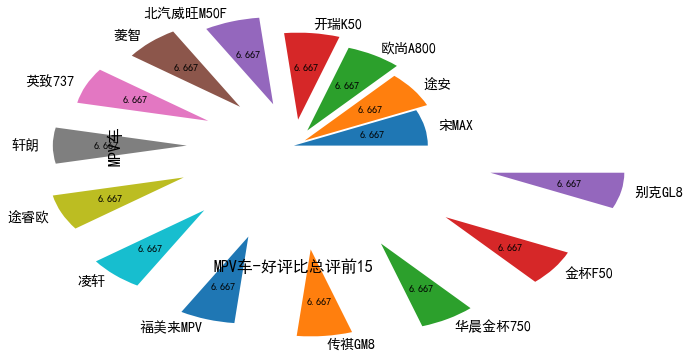

In [61]:
labels= list(data4_11['车名'].value_counts().index)
fracs = list(data4_11['好评/总评'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4,1.5] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.xlabel("MPV车-好评比总评前15")
plt.ylabel("MPV车")
plt.show()

In [69]:
# 中型车的 耗油 好评/总评 分析
data4_2=data4_[(data4_['类型']=='中型车')]
data4_21=data4_2.head(15)

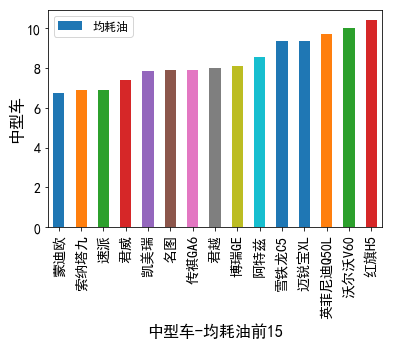

In [70]:
data4_21.sort_values(by='均耗油',inplace=True)
data4_21.plot.bar(x='车名',y='均耗油')
plt.xlabel("中型车-均耗油前15")
plt.ylabel("中型车")
plt.show()

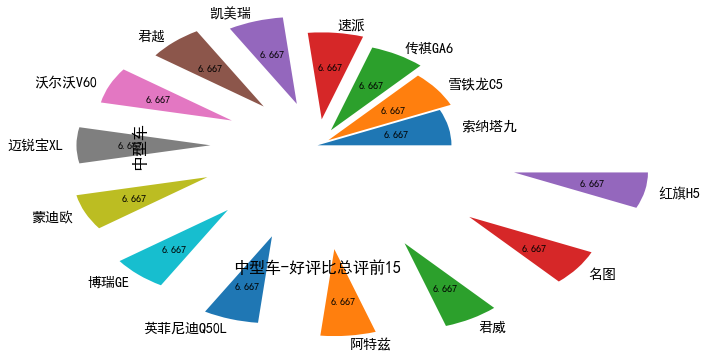

In [71]:
labels= list(data4_21['车名'].value_counts().index)
fracs = list(data4_21['好评/总评'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4,1.5] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.xlabel("中型车-好评比总评前15")
plt.ylabel("中型车")
plt.show()

In [81]:
# 中型车的 耗油 好评/总评 分析
data4_3=data4_[(data4_['类型']=='中大型车')]
data4_31=data4_3.head(15)

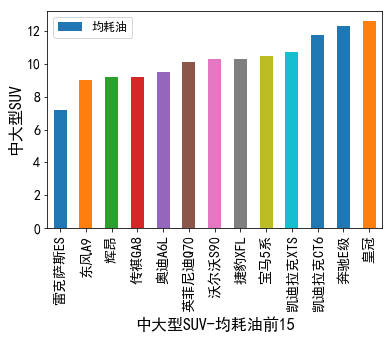

In [82]:
data4_31.sort_values(by='均耗油',inplace=True)
data4_31.plot.bar(x='车名',y='均耗油')
plt.xlabel("中大型车-均耗油前15")
plt.ylabel("中大型车")
plt.show()

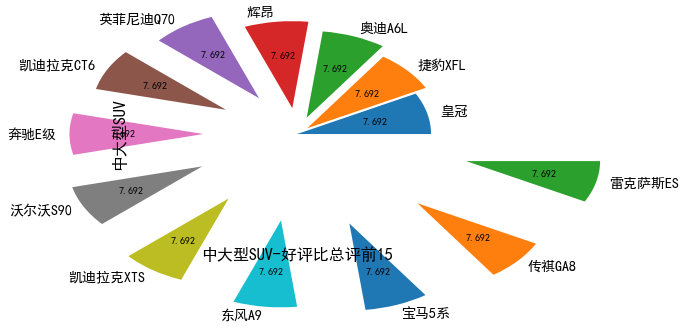

In [85]:
labels= list(data4_31['车名'].value_counts().index)
fracs = list(data4_31['好评/总评'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.xlabel("中大型车-好评比总评前15")
plt.ylabel("中大型车")
plt.show()

In [89]:
# 中型SUV 的  好评/总评 分析
data4_4=data4_[(data4_['类型']=='中型SUV')]
data4_41=data4_4.head(15)

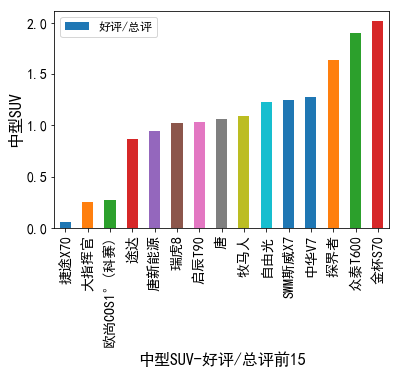

In [93]:
data4_41.sort_values(by='好评/总评',inplace=True)
data4_41.plot.bar(x='车名',y='好评/总评')
plt.xlabel("中型SUV-好评/总评前15")
plt.ylabel("中型SUV")
plt.show()

In [91]:
# 中大型SUV 的  好评/总评 分析
data4_5=data4_[(data4_['类型']=='中大型SUV')]
data4_51=data4_5.head(15)

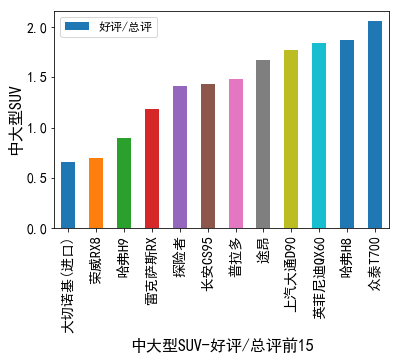

In [94]:
data4_51.sort_values(by='好评/总评',inplace=True)
data4_51.plot.bar(x='车名',y='好评/总评')
plt.xlabel("中大型SUV-好评/总评前15")
plt.ylabel("中大型SUV")
plt.show()

In [98]:
# 5根据评论数大于80条的车辆里进行汽车牌子的排名，前5名牌子的汽车根据评分对车辆进行降序排列
data5=data[data.总评数>80]
data5=data5.sort_values('总评数',ascending=False)
data5.head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0
49,名爵6,名爵,紧凑型车,4.69,146800,96800,3259,"悬架减震偏硬,胎噪有点大,车内静音效果不是很好",1217,"乘坐空间不错,外观漂亮,油耗满意,安全配置齐全,后备厢空间大,悬架减震偏硬,加速动力十足,胎...",7250,"乘坐空间不错,外观漂亮,油耗满意",3921,7.3,7.2
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5


In [102]:
# 前5名牌子的汽车根据评分对车辆进行降序排列
data5_1=data5.head(5)
data5_1=data5_1.sort_values('评分',ascending=False)
data5_1

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
49,名爵6,名爵,紧凑型车,4.69,146800,96800,3259,"悬架减震偏硬,胎噪有点大,车内静音效果不是很好",1217,"乘坐空间不错,外观漂亮,油耗满意,安全配置齐全,后备厢空间大,悬架减震偏硬,加速动力十足,胎...",7250,"乘坐空间不错,外观漂亮,油耗满意",3921,7.3,7.2
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0


In [113]:
# 6针对最低价10以下，10-30,30-100,100w的车，对于厂商进行分析，饼状图
data6=data[data.最低价<=100000]  #最低价10以下
data6.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0


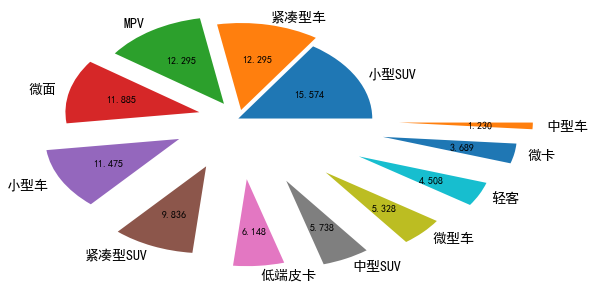

In [114]:
# 10w一下，厂商进行分析，饼状图
labels= list(data6['类型'].value_counts().index)
fracs = list(data6['类型'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [123]:
# 10w-30w一下，厂商进行分析，饼状图
data6_2=data[data.最低价>100000]  #最低价10以下
data6_2=data6_2[data6_2.最低价<=300000]

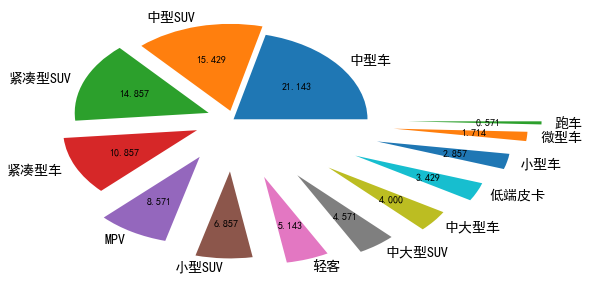

In [126]:
labels= list(data6_2['类型'].value_counts().index)
fracs = list(data6_2['类型'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [127]:
# 30w-100w一下，厂商进行分析，饼状图
data6_3=data[data.最低价>300000]  #最低价10以下
data6_3=data6_3[data6_3.最低价<=1000000]

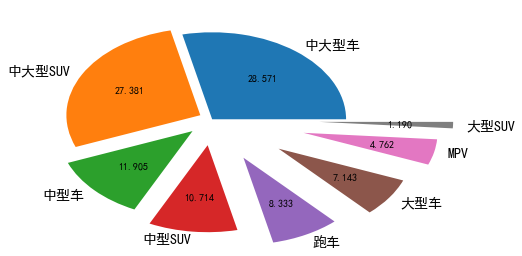

In [129]:
labels= list(data6_3['类型'].value_counts().index)
fracs = list(data6_3['类型'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [130]:
#最低价100w以上，厂商进行分析，饼状图
data6_4=data[data.最低价>1000000]  #最低价10以下

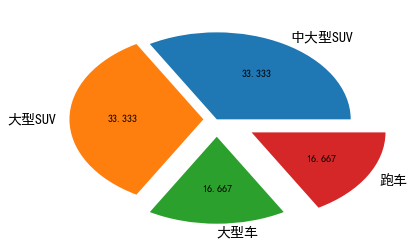

In [133]:
labels= list(data6_4['类型'].value_counts().index)
fracs = list(data6_4['类型'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [164]:
# 8并对这些车好评分析，看购买者关注的点，词云展示，并展示评价多的车前5辆
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0


In [165]:
final = ''  
stopwords = ['车','（','）','nan','','NaN'] # 停止词
for n in range(len(data)):
#     print(n)
    a = data['好评词'][n]
    if a =='' or a=='NaN' or a is None or type(a) =='float' or n==193:  # n 为193有毒,193的 评论为空
        continue
    seg_list = list(jieba.cut(a))
#     print(type(seg_list),n)
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

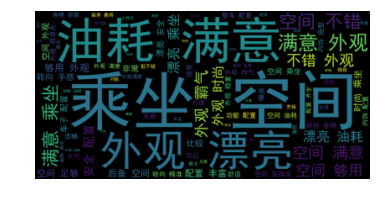

In [166]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font).generate(final)
final = " ".join(jieba.cut(final))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [170]:
# 舆情
# 对好评词，坏评词。所有的数据进行舆情分析
from snownlp import SnowNLP  # 舆情分析库
def get_sentiment_cn(text):  
    s = SnowNLP(str(text))     # 原始数据，汇报 float没有 len错误。所以加 str
    return s.sentiments

In [171]:
data["sentiment"] = data.好评词.apply(get_sentiment_cn)  # 好评内容舆情分数
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340


In [172]:
data["LowSentiment"] = data.差评词.apply(get_sentiment_cn)  # 差评内容舆情分数
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958,0.135649
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265,0.878560
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932,0.005907
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340,0.843050


In [173]:
# 通过 好评舆情数 - 差评 舆情数 除以总评论数量。得出的数。判断哪个车舆情口碑好
data["AveSentiment"] = (data['sentiment']-data['LowSentiment'])/data['总评数']
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment,AveSentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958,0.135649,0.216077
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265,0.878560,0.001081
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110,0.247775
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932,0.005907,0.016295
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340,0.843050,-0.018746


In [174]:
data.sort_values('AveSentiment',ascending=False).head() # 舆情评分最高的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment,AveSentiment
423,比亚迪S6,比亚迪,中型SUV,4.75,136900,89900,1,隔音不好,3,"乘坐空间满意,安全配置一应俱全,高速油耗满意,隔音不好",26,"乘坐空间满意,安全配置一应俱全,高速油耗满意",23,NaN,NaN,0.995487,0.136627,0.858860
228,大7 MPV,纳智捷,MPV,4.38,259800,169800,1,NaN,0,乘坐空间比较满意,5,乘坐空间比较满意,5,11.5,11.5,0.816939,0.500000,0.316939
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110,0.247775
197,启辰M50V,启辰,MPV,4.75,90900,65800,4,"后备厢空间太小,外漆面很薄,车尾灯丑",25,"油耗满意,乘坐空间不错,外观时尚,后备厢空间太小,前排座椅舒适,转向手感很轻,头部空间大,高...",164,"油耗满意,乘坐空间不错,外观时尚",99,NaN,NaN,0.999017,0.010727,0.247073
323,起亚KX3,起亚,小型SUV,4.88,132800,109800,3,"悬架减震偏硬,胎噪比较大,起步动力肉",16,"油耗满意,乘坐空间不错,外观漂亮,悬架减震偏硬,胎噪比较大,安全配置不赖,高速油耗满意,首保...",62,"油耗满意,乘坐空间不错,外观漂亮",32,NaN,NaN,0.999297,0.343291,0.218669


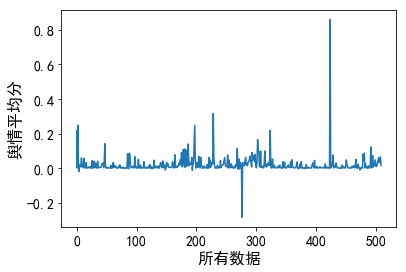

In [175]:
# 舆情平均分画图。查看舆情分数波动
data['AveSentiment'].plot()
plt.xlabel("所有数据")
plt.ylabel("舆情平均分")
plt.show()

In [176]:
# 各个车类型 的 舆情平均分
AveSentiment = data.groupby('类型')['AveSentiment'].mean()
AveSentiment

类型
MPV       0.031074
中型SUV     0.026994
中型车       0.009523
中大型SUV    0.024635
中大型车      0.021330
低端皮卡      0.038126
大型SUV     0.043676
大型车       0.044665
小型SUV     0.014550
小型车       0.017234
微卡       -0.008547
微型车       0.040738
微面        0.021727
紧凑型SUV    0.006700
紧凑型车      0.010820
跑车        0.039330
轻客        0.041978
Name: AveSentiment, dtype: float64

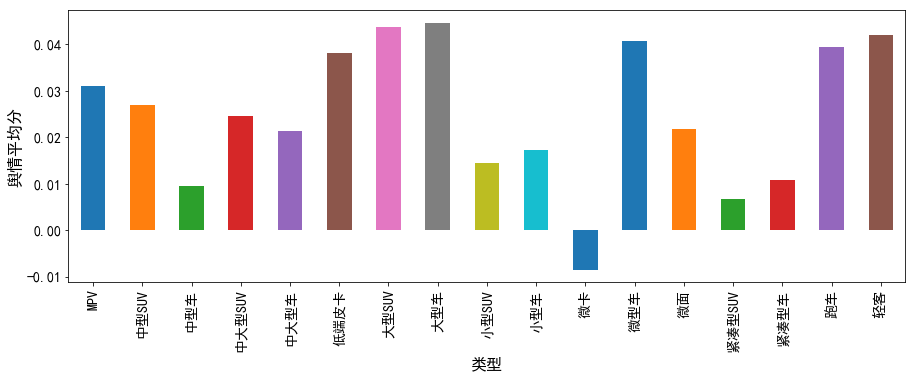

In [177]:
# 每个类型的舆情平均评分，画出柱状图
plt.figure(figsize=(15,5))  # 控制 图片的 长宽
AveSentiment.plot.bar()
plt.ylabel("舆情平均分")
plt.show()

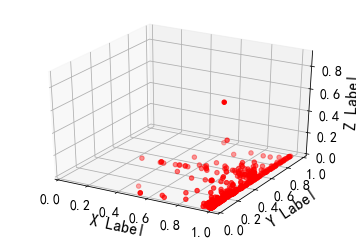

In [178]:
#差评舆情分数，好评舆情分数，和 平均舆情分数。3d立体
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3d


if __name__ == '__main__':
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # 创建axes类
    xs = data['sentiment'].values
    ys = data['LowSentiment'].values
    zs = data['AveSentiment'].values
    ax.scatter(xs, ys, zs, c='r', marker='o')  # axes类可以绘图
    ax.set_xlim(0)  # axes类可以操作本身(子图)的信息，只不过和plt模块的姿势不同
    ax.set_ylim(0)
    ax.set_zlim(0)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()